# Instructor Do: Connecting Neurons

In [8]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Creating Dummy Data

In [10]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [11]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [12]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df_moons.head()

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


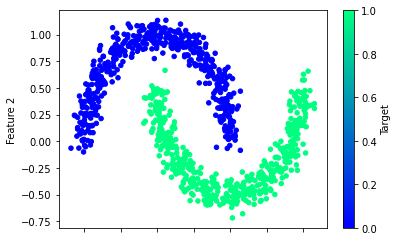

In [13]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

## Data Preprocessing

In [14]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

In [15]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [16]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

## Neural Network Model Creation

![Simple neural network](../Images/simple-nn.png)

In [18]:
# Create the sequential model
nn = Sequential()

### Fisrt Layer

![First Layer](../Images/simple-nn-layer-1.png)

In [19]:
# First layer
number_inputs = 2
number_hidden_nodes = 6

nn.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

### Output Layer

![Output layer](../Images/simple-nn-layer-2.png)

In [20]:
# Output layer
number_classes = 1

nn.add(Dense(units=number_classes, activation="sigmoid"))

In [21]:
# Model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [22]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fit the Model

In [23]:
# Training the model with the non-linear data
model_moon = nn.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7442 - accuracy: 0.3960
Epoch 2/100
24/24 [==============================] - 0s 997us/step - loss: 0.7068 - accuracy: 0.5237
Epoch 3/100
24/24 [==============================] - 0s 915us/step - loss: 0.6745 - accuracy: 0.5310
Epoch 4/100
24/24 [==============================] - 0s 878us/step - loss: 0.6401 - accuracy: 0.5458
Epoch 5/100
24/24 [==============================] - 0s 891us/step - loss: 0.6101 - accuracy: 0.5931
Epoch 6/100
24/24 [==============================] - 0s 845us/step - loss: 0.5970 - accuracy: 0.6724
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7753
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7758
Epoch 9/100
24/24 [==============================] - 0s 921us/step - loss: 0.5121 - accuracy: 0.7958
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.80

## Model Evaluation

In [24]:
# Evaluate the model using non-linear testing data
model_moon_loss, model_moon_accuracy = nn.evaluate(
    X_moon_test_scaled, y_moon_test, verbose=2
)
print(f"Loss: {model_moon_loss}, Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.2182 - accuracy: 0.8840
Loss: 0.21823707222938538, Accuracy: 0.8840000033378601
